In [1]:
from os import listdir
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from PIL import Image
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import random

Using TensorFlow backend.


In [11]:
def load_photos(directory):
    images = []
    labels_dir = []
    dir_list = listdir(directory)
    random.shuffle(dir_list)
    for name in dir_list:
        filename = directory + '/' + name
        # load an image from file
        image = load_img(filename, target_size=(96, 160))
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        # get image id + labels
        value_dir = float(name.split('_')[0])
        labels_dir.append(value_dir)
        images.append(image)
    return images, labels_dir

In [12]:
dataset = "../../../../Auto"

In [13]:
# load images from both train and test groups
directory = dataset+'/Train'
images, labels_dir = load_photos(directory)
nb_images = len(images)
print('Loaded Images and labels for training: %d' % nb_images)

Loaded Images and labels for training: 663


In [14]:
#Normalise images
images = np.array(images)
images /= 255.0

In [16]:
#convert datas to dummyvalues
labels_dir = np.array(pd.get_dummies(labels_dir))

(array([1, 0, 0], dtype=uint8), <matplotlib.image.AxesImage at 0x1cae4864668>)

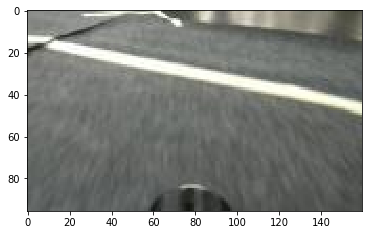

In [17]:
labels_dir[42], plt.imshow(images[42])

In [18]:
from keras.models import Model, Sequential
from keras.layers import *
import keras.backend as K
import keras.optimizers as Optimizers
import keras.callbacks

In [19]:
#from keras.models import load_model
#model = load_model("model_bigrace_original_5.h5")

In [42]:
'''
Model from PatateV2
'''

K.clear_session()
############################################################# 

img_in = Input(shape=(96, 160, 3), name='img_in')
x = img_in

x = Convolution2D(2, (5,5), strides=(2,2), use_bias=False)(x)       
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Convolution2D(4, (5,5), strides=(2,2), use_bias=False)(x)       
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(.4)(x)
x = Convolution2D(8, (5,5), strides=(2,2), use_bias=False)(x)       
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(.5)(x)

x = Flatten(name='flattened')(x)

x = Dense(100, use_bias=False)(x) 
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(.4)(x)
x = Dense(50, use_bias=False)(x)  
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(.3)(x)

out_dir = Dense(3, activation='softmax')(x)


# Compile Model
model = Model(inputs=[img_in], outputs=[out_dir])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img_in (InputLayer)          (None, 96, 160, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 78, 2)         150       
_________________________________________________________________
batch_normalization_1 (Batch (None, 46, 78, 2)         8         
_________________________________________________________________
activation_1 (Activation)    (None, 46, 78, 2)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 37, 4)         200       
_________________________________________________________________
batch_normalization_2 (Batch (None, 21, 37, 4)         16        
_________________________________________________________________
activation_2 (Activation)    (None, 21, 37, 4)         0         
__________

In [43]:
model_name="model_test.h5"

In [44]:
#save best model if model improved
best_checkpoint = keras.callbacks.ModelCheckpoint(model_name, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [45]:
h = model.fit(images, labels_dir, batch_size=64, epochs=100, validation_split=0.2, verbose=1, callbacks=[best_checkpoint])

Train on 530 samples, validate on 133 samples
Epoch 1/100
530/530 [==============================] - 2s 4ms/step - loss: 1.2447 - acc: 0.4170 - val_loss: 0.9035 - val_acc: 0.6241

Epoch 00001: val_loss improved from inf to 0.90346, saving model to model_test.h5
Epoch 2/100
530/530 [==============================] - 1s 2ms/step - loss: 1.0305 - acc: 0.5283 - val_loss: 0.8339 - val_acc: 0.5188

Epoch 00002: val_loss improved from 0.90346 to 0.83389, saving model to model_test.h5
Epoch 3/100
530/530 [==============================] - 1s 2ms/step - loss: 0.8107 - acc: 0.6377 - val_loss: 0.6031 - val_acc: 0.7895

Epoch 00003: val_loss improved from 0.83389 to 0.60306, saving model to model_test.h5
Epoch 4/100
530/530 [==============================] - 1s 2ms/step - loss: 0.6434 - acc: 0.7604 - val_loss: 0.4999 - val_acc: 0.8872

Epoch 00004: val_loss improved from 0.60306 to 0.49992, saving model to model_test.h5
Epoch 5/100
530/530 [==============================] - 1s 2ms/step - loss: 0.5

530/530 [==============================] - 1s 2ms/step - loss: 0.1201 - acc: 0.9604 - val_loss: 0.4794 - val_acc: 0.8421

Epoch 00043: val_loss did not improve
Epoch 44/100
530/530 [==============================] - 1s 2ms/step - loss: 0.1250 - acc: 0.9585 - val_loss: 0.0810 - val_acc: 0.9850

Epoch 00044: val_loss did not improve
Epoch 45/100
530/530 [==============================] - 1s 2ms/step - loss: 0.1108 - acc: 0.9698 - val_loss: 0.2291 - val_acc: 0.9323

Epoch 00045: val_loss did not improve
Epoch 46/100
530/530 [==============================] - 1s 2ms/step - loss: 0.1121 - acc: 0.9585 - val_loss: 0.2479 - val_acc: 0.9173

Epoch 00046: val_loss did not improve
Epoch 47/100
530/530 [==============================] - 1s 2ms/step - loss: 0.1413 - acc: 0.9396 - val_loss: 0.0808 - val_acc: 0.9774

Epoch 00047: val_loss did not improve
Epoch 48/100
530/530 [==============================] - 1s 2ms/step - loss: 0.1041 - acc: 0.9604 - val_loss: 0.1055 - val_acc: 0.9699

Epoch 00048: 


Epoch 00089: val_loss improved from 0.05120 to 0.04519, saving model to model_test.h5
Epoch 90/100
530/530 [==============================] - 1s 3ms/step - loss: 0.0677 - acc: 0.9811 - val_loss: 0.0484 - val_acc: 0.9774

Epoch 00090: val_loss did not improve
Epoch 91/100
530/530 [==============================] - 1s 3ms/step - loss: 0.0671 - acc: 0.9736 - val_loss: 0.0665 - val_acc: 0.9699

Epoch 00091: val_loss did not improve
Epoch 92/100
530/530 [==============================] - 1s 3ms/step - loss: 0.0626 - acc: 0.9736 - val_loss: 0.0701 - val_acc: 0.9699

Epoch 00092: val_loss did not improve
Epoch 93/100
530/530 [==============================] - 1s 3ms/step - loss: 0.0421 - acc: 0.9868 - val_loss: 0.1608 - val_acc: 0.9398

Epoch 00093: val_loss did not improve
Epoch 94/100
530/530 [==============================] - 1s 3ms/step - loss: 0.0663 - acc: 0.9830 - val_loss: 0.0691 - val_acc: 0.9699

Epoch 00094: val_loss did not improve
Epoch 95/100
530/530 [==========================

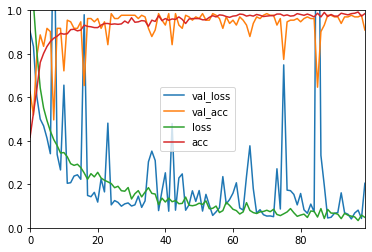

In [46]:
#print History graph
historydf = pd.DataFrame(h.history, index=h.epoch)
historydf.plot(ylim=(0,1))